In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

import numpy as np
import sympy as sp
import sympy.plotting.plot as symplot
import scipy as scp
from scipy.signal import find_peaks
import math

from IPython.display import display, Math

### Algebra II

#### 1. Summation and Products

##### 1.1 Summation

$$a = \{1, 3, 4, 1, 6\}$$

$$a_1 + a_2 + \cdots + a_n = \sum^n_{i=1}{a_i}$$

##### 1.2 Product

$$a = \{1, 3, 4, 1, 6\}$$

$$a_1 \times a_2 \times \cdots \times a_n =\prod^n_{i=1}{a_i}$$

##### 1.3 Cumulative Sum

$$y_k = \sum^k_{i = 1}{a_i}$$

$$y_1 = a_1$$

$$y_2 = a_1 + a_2$$

$$y_3 = a_1 + a_2 + a_3$$

$$\cdots$$

$$y_k = a_1 + a_2 + \cdots + a_k$$

##### 1.4 Cumulative Product

- Same as cumulative sum, but with multiplication

In [2]:
# Summation

lst = [1, 3, 4, 1, 6]

sum(lst), np.sum(lst)

(15, 15)

In [3]:
# Product

np.prod(lst)

72

In [4]:
# Cummulative Sum

np.cumsum(lst)

array([ 1,  4,  8,  9, 15])

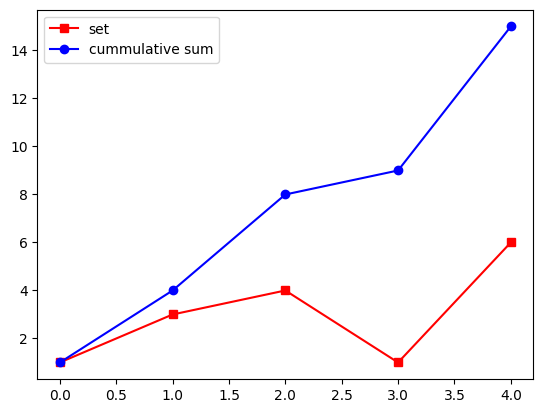

In [5]:
plt.plot(lst, 'rs-')
plt.plot(np.cumsum(lst), 'bo-')

plt.legend(['set', 'cummulative sum'])

plt.show()

In [6]:
# Cummulative Product

np.cumprod(lst)

array([ 1,  3, 12, 12, 72])

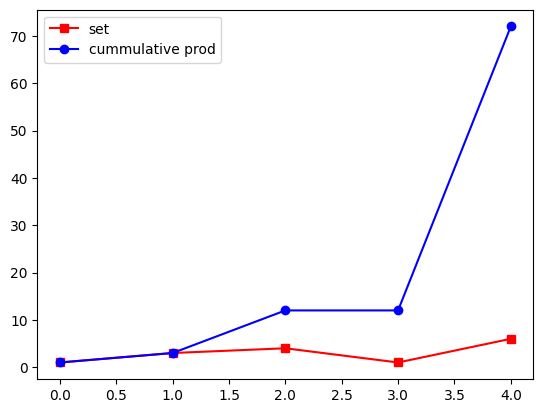

In [7]:
plt.plot(lst, 'rs-')
plt.plot(np.cumprod(lst), 'bo-')

plt.legend(['set', 'cummulative prod'])

plt.show()

##### Exercise

In [8]:
a = np.arange(1, 6)

print('Option 1 = %s' %(np.sum(a) / np.sum(a**2)))
print('Option 2 = %s' %(1/np.sum(a)))

Option 1 = 0.2727272727272727
Option 2 = 0.06666666666666667


In [9]:
print('Option 1 = %s' %(np.prod(a) / np.prod(a**2)))
print('Option 2 = %s' %(1/np.prod(a)))

Option 1 = 0.008333333333333333
Option 2 = 0.008333333333333333


#### 2. Differences (Discrete Derivative)

- Often applied to time series: $y_t = x_t + 1 - x_t$ 

In [10]:
x = [1, 3, 4, 6]

np.diff(x) # shows difference of 3-1, 4-3, 6-4

array([2, 1, 2])

In [11]:
v = np.arange(0, 11)  # same as range

print(np.diff(v))
print(np.diff(v, 2))  # takes the first difference and then the difference of the remaning 1's
print(np.diff(np.diff(v)))  # same as above, easier to understand

[1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]


##### Exercise

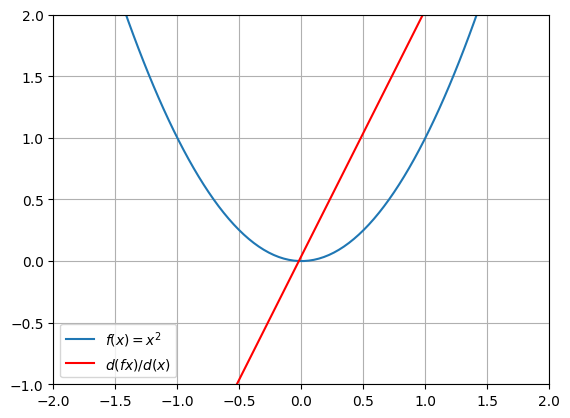

In [12]:
x = np.linspace(-2, 2, 100)
fx = x**2
dfx = np.diff(fx)
dx = np.diff(x)

plt.plot(x, fx, label='$f(x) = x^2$')
plt.plot(x[:-1], dfx/dx, 'r', label='$d(fx)/d(x)$')

plt.ylim([-1, 2])
plt.xlim([-2, 2])

plt.legend()
plt.grid()

plt.show()

#### 3. Roots of Polynomials 

$$a_0 + a_1x + a_2x^2 + \cdots + a_nx^n$$

$$a \rightarrow \text{coefficient}$$

$$x \rightarrow \text{variable}$$

$$a_0 + a_1x + a_2x^2 + \cdots + a_nx^n = 0$$

$$\text{Set to 0, solve for x -> "roots"}$$

In [13]:
# polynomial: 3x^2 +2x -1 = 0

# define the coefficients, starting from the largest

coefs = [3, 2, -1]

roots = np.roots(coefs)
roots

array([-1.        ,  0.33333333])

In [14]:
x = sp.symbols('x')

eq = 3*x**2 + 2*x - 1

for root in roots:
    display(Math('\\text{At x} = %g, \\quad %s = %g' %(root, sp.latex(eq), eq.subs(x, root))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We can see a computational error with the second root

##### Exercise

In [15]:
for i in range(1, 11):
    coefs = np.arange(1, i + 1)
    roots = np.roots(coefs)
    print('A degree-%s polynomial has %s roots' %(len(coefs) - 1, len(roots)))

A degree-0 polynomial has 0 roots
A degree-1 polynomial has 1 roots
A degree-2 polynomial has 2 roots
A degree-3 polynomial has 3 roots
A degree-4 polynomial has 4 roots
A degree-5 polynomial has 5 roots
A degree-6 polynomial has 6 roots
A degree-7 polynomial has 7 roots
A degree-8 polynomial has 8 roots
A degree-9 polynomial has 9 roots


#### 4. The Quadratic Equation

$$ax^2 + bx + c = 0$$

In [16]:
a, b, c = 2, 7, 5

quadeqP = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
quadeqN = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)

print(quadeqP, quadeqN)

-1.0 -2.5


In [17]:
a, b, c = 3, 7, 5

quadeqP = (-b + np.sqrt(b**2 - 4*a*c, dtype=complex)) / (2*a)
quadeqN = (-b - np.sqrt(b**2 - 4*a*c, dtype=complex)) / (2*a)

print(quadeqP, quadeqN)

(-1.1666666666666665+0.5527707983925666j) (-1.1666666666666665-0.5527707983925666j)


In [18]:
def quadeq(a, b, c):
    out = np.zeros(2, dtype=complex)
    
    out[0] = (-b + np.sqrt(b**2 - 4*a*c, dtype=complex)) / (2*a)
    out[1] = (-b - np.sqrt(b**2 - 4*a*c, dtype=complex)) / (2*a)

    return out

quadeq(2, 7, 5)

array([-1. +0.j, -2.5+0.j])

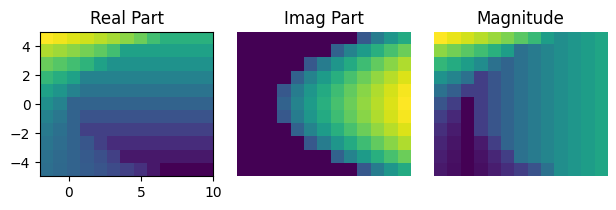

In [19]:
a = 1
b = range(-5, 6)
c = range(-2, 11)

M = np.zeros((len(b), len(c)), dtype=complex)

for i in range(0, len(b)):
    for j in range(0, len(c)):
        M[i, j] = quadeq(a, b[i], c[j])[0]

plt.subplot(1, 3, 1)
plt.imshow(M.real, extent = [c[0], c[-1], b[0], b[-1]])
# plt.axis('off')
plt.title('Real Part')


plt.subplot(1, 3, 2)
plt.imshow(M.imag, extent = [c[0], c[-1], b[0], b[-1]])
plt.axis('off')
plt.title('Imag Part')

plt.subplot(1, 3, 3)
plt.imshow(np.abs(M), extent = [c[0], c[-1], b[0], b[-1]])
plt.axis('off')
plt.title('Magnitude')

plt.tight_layout()
plt.show()

#### 5. Complex Numbers

##### 5.1 Addition & Subtraction

$$x^2 + 1 = 0$$
$$x^2 = -1$$
$$x = \pm \sqrt{-1}$$
$$x = \pm i$$

<br>

$$z = a\quad bi$$
$$w = c \quad di$$
$$z + w = (a + c)(b + d)i$$
$$z - w = (a - c)(b - d)i$$



In [20]:
1j # j is a built in name for the imaginary operator 

1j

In [21]:
np.sqrt(-1, dtype=complex)

1j

In [22]:
real_part = 4
imag_part = -5

cn1 = complex(real_part, imag_part)
cn2 = real_part + 1j*imag_part

cn1, cn2

((4-5j), (4-5j))

In [23]:
# Addition

z1 = complex(4, 5)
z2 = complex(3, 2)

z1 + z2

(7+7j)

In [24]:
# Subtraction

z1 - z2

(1+3j)

In [25]:
z1.real, z1.imag

(4.0, 5.0)

In [26]:
z2.real, z2.imag

(3.0, 2.0)

##### Exercise

In [27]:
w = complex(2, 4)
z = complex(5, 6)

w + z == complex(w.real + z.real, w.imag + z.imag)

True

##### 5.2 Conjugate and Multiplication

$$z = a bi$$
$$w = c di$$

$$z \times w = (abi)\times(cdi)$$
$$ = ac + adi + cbi + bdi^2$$
$$ = ac+ adi + cbi - bd$$ 
$$\text{ bd turns negative, since } i^2 = -1$$ 

<br>

$$\text{Complex Conjugate Notation} \rightarrow z^* \text{ or  } \overline{z}$$

- The conjugate of a complex number is obtained by changing the sign of its imaginary part.

- i.e. $ a + bi \rightarrow a - bi$ and vice versa

- Multiplication with a complex conjugate

$$z \times z^* = (abi) \times (a - bi)$$
$$= a^2 - abi + abi - (bi)^2$$
$$= a^2 + b^2$$

In [28]:
z1 = complex(4, 5)
z2 = complex(6, -2)

z1*z2

(34+22j)

In [29]:
# Conjugate

np.conj(z1), np.conj(z2)

((4-5j), (6+2j))

##### Exercise

In [30]:
# Show that ZxZ* = a^2 + b^2

z1 = complex(4, 5)
z1_conj = np.conj(z1)

display(Math('%s \\times %s = %s^2 + %s^2' %(z1, z1_conj, int(z1.real), int(z1.imag))))

<IPython.core.display.Math object>

##### 5.3 Division

- The Complex Conjugate Trick for Division

$$\frac{4 +2i}{2 - 3i} = \quad ???$$

$$\text{We multiply both, the numerator and the denominator by the complex conjugate of the denominator}$$

$$\frac{4 +2i}{2 - 3i} = \frac{(4 + 2i)(2 + 3i)}{(2 - 3i)(2 + 3i)}$$

<br>

$$= \frac{8 + 12i + 4i - 6}{2^2 + 3^2}$$

<br>

$$= \frac{2 + 16i}{13}$$


In [31]:
z = complex(4, 2)

Math('\\frac{%s}{2} = %s' %(sp.latex(sp.sympify(z)), sp.latex(sp.sympify(z/2))))

<IPython.core.display.Math object>

In [32]:
z1 = complex(4, 2)
z2 = complex(2, -3)

display(Math(
    '\\frac{%s}{%s} = \\frac{%s \\times %s}{%s \\times %s} = %s'  \
    %(z1, z2,  \
      z1, np.conj(z2), z2, np.conj(z2),  \
      z1/z2
)))

<IPython.core.display.Math object>

##### Exercise

In [33]:
z = complex(4, 2)
w = complex(3, 5)

left_num = (z-1) * (z*w + w)
left_denom = w*z - w
left_part = left_num / left_denom

right_num = (w-1) * (1-w)
right_denom = -w**2*z - w**2 + 2*w*z + 2*w - z - 1
right_part = right_num / right_denom

solution = left_part * right_part
solution

(1+0j)

##### 5.4 Graphing Complex Numbers

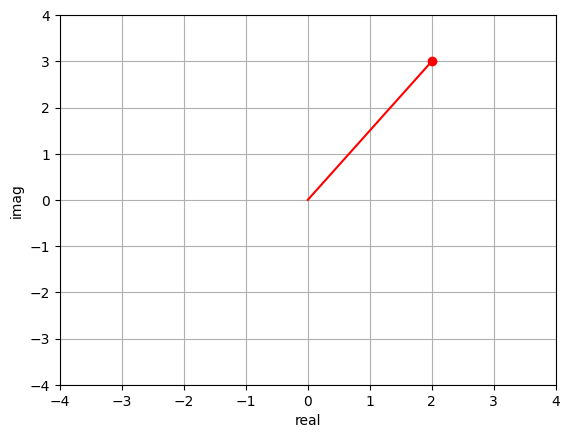

In [34]:
z = complex(2, 3)

plt.plot(z.real, z.imag, 'ro')
plt.plot([0, z.real], [0, z.imag], 'r')

plt.xlabel('real')
plt.ylabel('imag')

plt.grid()
plt.axis([-4, 4, -4, 4])

plt.show()

##### Exercise

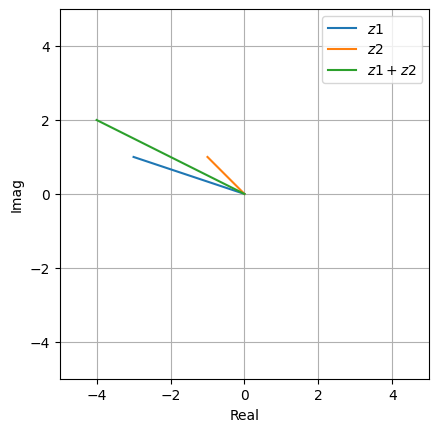

In [35]:
z1 = complex(-3, 1)
z2 = complex(-1, 1)

added = z1 + z2
multiplied = z1*z2

plt.plot([0, z1.real], [0, z1.imag], label='$z1$')
plt.plot([0, z2.real], [0, z2.imag], label='$z2$')
plt.plot([0, added.real], [0, added.imag], label='$z1 + z2$')


plt.xlabel('Real')
plt.ylabel('Imag')

plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid()
plt.legend()

plt.show()

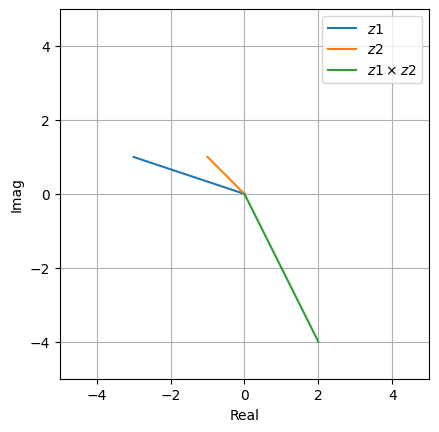

In [36]:
plt.plot([0, z1.real], [0, z1.imag], label='$z1$')
plt.plot([0, z2.real], [0, z2.imag], label='$z2$')
plt.plot([0, multiplied.real], [0, multiplied.imag], label='$z1 \\times z2$')


plt.xlabel('Real')
plt.ylabel('Imag')

plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid()
plt.legend()

plt.show()

#### 6. The Unit Circle

- The unit circle is a circle with a radius of 1 centered at the origin in a coordinate system.

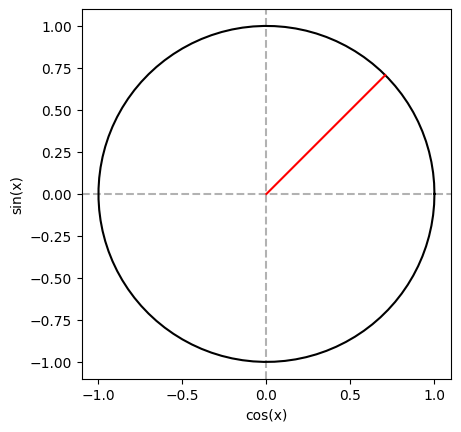

In [37]:
x = np.linspace(0, 2*np.pi, 100)

plt.plot(np.cos(x), np.sin(x), 'k')
plt.plot([-1.1, 1.1], [0, 0], 'k--', alpha=0.3)
plt.plot([0, 0], [-1.1, 1.1], 'k--', alpha=0.3)

angle = np.pi/4
plt.plot([0, np.cos(angle)], [0, np.sin(angle)], 'r')


plt.axis('square')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.xlabel('cos(x)')
plt.ylabel('sin(x)')


plt.show()

##### Exercise

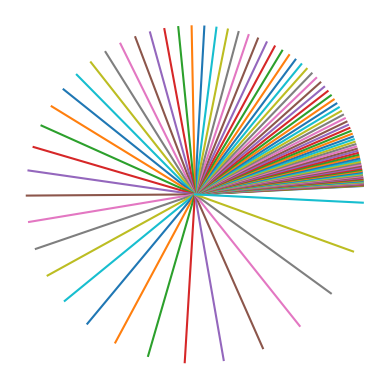

In [38]:
x = np.linspace(-3, 1.83, 100)
k = np.exp(x)

for i in k:
    plt.plot([0, np.cos(i)], [0, np.sin(i)])

plt.axis('square')
plt.axis('off')

plt.show()

#### 7. Natural Exponent and Logarithm

- The natural exponent, denoted as 'e,' represents the base of the natural logarithm and is an irrational number approximately equal to 2.71828.

- The natural logarithm, written as ln(x) or loge(x), is the logarithm to the base 'e' and gives the exponent to which 'e' must be raised to obtain a certain number 'x.'

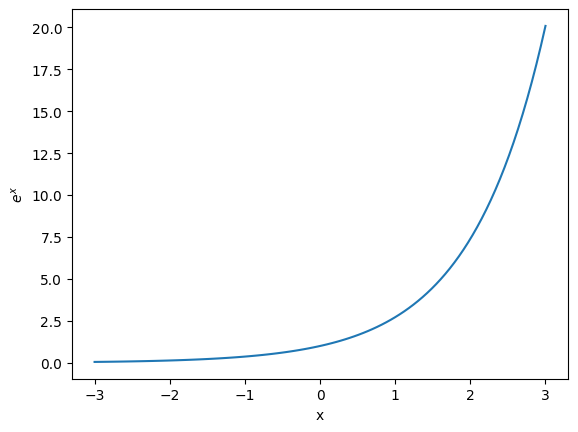

/tmp/ipykernel_337913/2599848521.py:8: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.log(x))


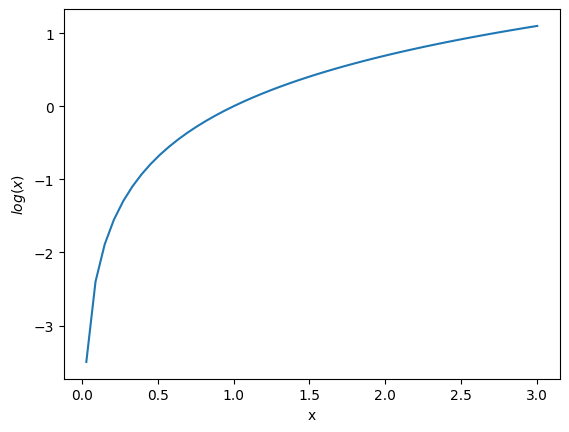

In [39]:
x = np.linspace(-3, 3, 100)

plt.plot(x, np.exp(x))
plt.xlabel('x')
plt.ylabel('$e^x$')
plt.show()

plt.plot(x, np.log(x))
plt.xlabel('x')
plt.ylabel('$log(x)$')
plt.show()

##### Exericse

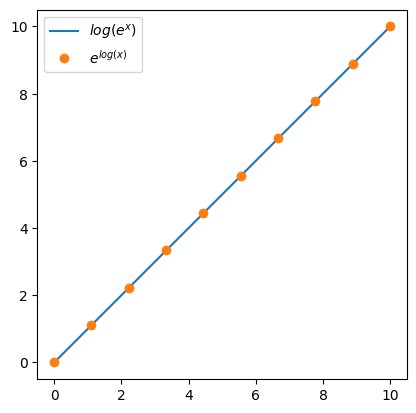

In [40]:
x = np.linspace(0.0001, 10, 10)

y1 = np.log(np.exp(x))
y2 = np.exp(np.log(x))

plt.plot(x, y1, label='$log(e^x)$')
plt.plot(x, y2, 'o', label='$e^{log(x)}$')

plt.axis('square')
plt.legend()

plt.show()

#### 8. Find a Specific Point on a Gaussian

$$ y = e^{\frac{-4ln(2)t^2}{h^2}}$$ 

- Simplified Form: 

$$ y = exp \left(\frac{-4ln(2)t^2}{h^2}\right)$$

- Where $h$ is the Full Width at Half Maximum (FWHM)

- And $t$ is a vector of time


$$ 1 = exp \left(\frac{-4ln(2)t^2}{h^2}\right)$$

- How to find how much $t$ should be in order to satisfy this equation:

1. Cancel $e$ with its inverse $ln$

$$ ln(1) = ln \left( exp \left(\frac{-4ln(2)t^2}{h^2}\right) \right)$$

- The natural logarithm of 1 is equal to 0, because the natural logarithm is the inverse function of the exponential function with base 'e.' In mathematical terms, $ln(x)$ gives the power to which $e$ must be raised to obtain the number $x$. Since $e^0$ is equal to $1$, $ln(1)$ is $0$.

$$ 0 = \frac{-4ln(2)t^2}{h^2}$$

$$ 0 \times h^2 = \frac{-4ln(2)t^2}{h^2} \times h^2$$

$$0 = -4ln(2)t^2$$

$$\frac{0}{-4ln(2)} = \frac{-4ln(2)t^2}{{-4ln(2)}}$$

$$0 = t^2$$

$$t = \sqrt{0} = 0$$



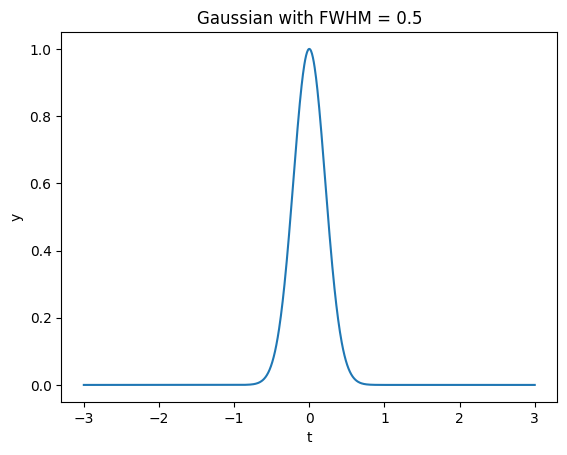

In [41]:
h = 0.5

t = np.linspace(-3, 3, 1001)

# Gaussian
y = np.exp(-4*np.log(2)*(t**2) / h**2)

plt.plot(t, y)

plt.xlabel('t')
plt.ylabel('y')
plt.title(f'Gaussian with FWHM = {h}')

plt.show()

In [42]:
yval2find = 0.5

tvals = h*np.sqrt(np.log(yval2find) / (-4*np.log(2)))

tvals, -tvals

(0.25, -0.25)

##### Exercise

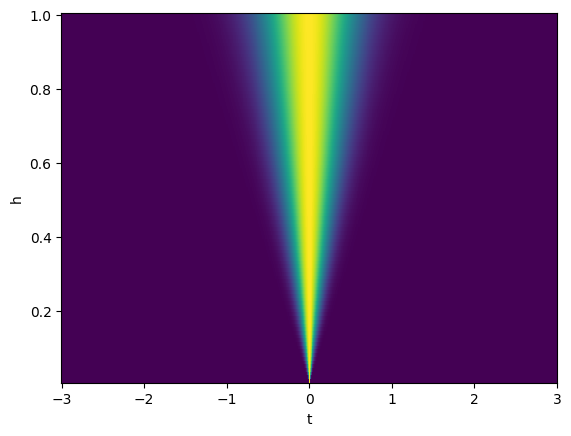

In [43]:
t = np.linspace(-3, 3, 1001)
n = 100

M = np.zeros((n, len(t)))
h = np.zeros(n)

for i in range(n):
    h[i] = (i + 1) / n
    M[i, :] = np.exp(-4*np.log(2)*(t**2) / h[i]**2)
    
plt.pcolormesh(t, h, M)

plt.xlabel('t')
plt.ylabel('h')

plt.show()

#### 9. Graphing the Complex Roots of Unity

- The roots of unity are complex numbers that, when raised to certain powers, equal 1, forming equally spaced points on the unit circle in the complex plane.

$$z^n = 1, \quad z \in \mathbb{C}$$

<br>

$$z = e^{2\pi ik/n}$$
$$k = 0, 1, \cdots n-1$$

In [44]:
n = 4

for k in range(0, n):
    z = np.exp(2*np.pi*1j*k / n)
    print(z**n)

(1+0j)
(1-2.4492935982947064e-16j)
(1-4.898587196589413e-16j)
(1-7.347880794884119e-16j)


In [45]:
# With sympy the rounding error is being removed

for k in range(0, n):
    z = sp.exp(2*sp.pi*sp.I*k / n)
    display(Math('(%s)^{%s} \\Rightarrow %s' %(sp.latex(z), n, sp.latex(z**n))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

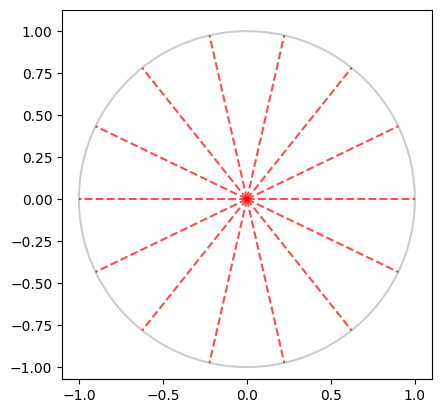

In [46]:
n = 14

for k in range(0, n):
    z = np.exp(2*np.pi*1j*k / n)
    plt.plot([0, np.real(z)], [0, np.imag(z)], 'r--', alpha=0.7)

plt.axis('square')

x = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(x), np.sin(x), 'k', alpha=0.2)
plt.show()

##### Exercise

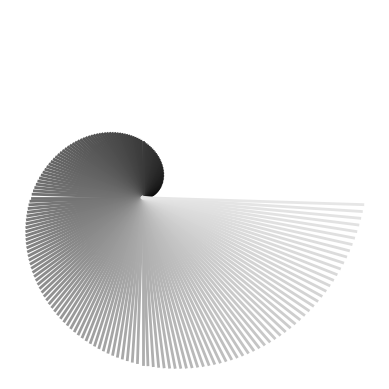

In [47]:
n = 200

colorval = np.linspace(0, 0.9, n)

for k in range(0, n):
    z = k*np.exp(2*np.pi*1j*k / n)
    plt.plot([
        0, np.real(z)], [0, np.imag(z)],
        linewidth=2, 
        color=[colorval[k], colorval[k], colorval[k]
      ])

plt.axis('square')
plt.axis('off')
plt.show()

#### 10. Log-spaced and Linearly Spaced Numbers

##### 10.1 Log and Linear Scales

- Linear: 1, 2, 3, 4, 5

- Log-space: 1, 1.5, 2.2, 3.3, 5

In [48]:
x = np.linspace(1, 2, 10)
x

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])

In [49]:
# setting a and b as upper and lower boundary of the logspace

a = np.log10(1)
b = np.log10(2)

np.logspace(a, b, 10)

array([1.        , 1.08005974, 1.16652904, 1.25992105, 1.36079   ,
       1.46973449, 1.58740105, 1.71448797, 1.85174942, 2.        ])

##### Exercise

Show that a linear scale approaches a log scale as the boundaries approach each other.

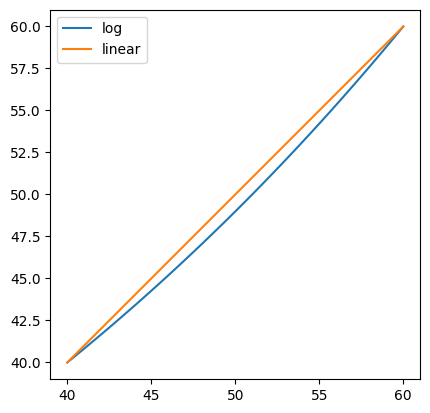

In [50]:
# The closer a and b (the boundaries) are, the closer approximation the two functions become

a = 40
b = 60
n = 50

lo = np.logspace(np.log10(a), np.log10(b), n)
li = np.linspace(a, b, n)

plt.plot(li, lo, label='log')
plt.plot(li, li, label='linear')

plt.axis('square')
plt.legend()

plt.show()

#### 11. Logarithm Properties: Multiplication and Division


- Multiplication property: $log(a \times b) = log(a) + log(b)$

- Division property: $log \left( \frac{a}{b} \right) = log(a) - log(b)$

In [51]:
a = 3
b = 4

res1 = np.log(a*b)
res2 = np.log(a) * np.log(b)
res3 = np.log(a) + np.log(b)

display(Math('\\log(%g \\times %g) = %g' %(a, b, res1)))
display(Math('\\log(%g) \\times log(%g) = %g' %(a, b, res2)))
display(Math('\\log(%g) + log(%g) = %g' %(a, b, res3)))

display(Math('\\log(%g \\times %g) = \\log(%g) + log(%g)' %(a, b, a, b)))
display(Math('\\log(%g \\times %g) \\neq \\log(%g) \\times log(%g)' %(a, b, a, b)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [52]:
res1 = np.log(a/b)
res2 = np.log(a) / np.log(b)
res3 = np.log(a) - np.log(b)

display(Math('\\log \left( \\frac{%g}{%g} \\right) = %g' %(a, b, res1)))
display(Math('\\frac{\\log(%g)}{log(%g)} = %g' %(a, b, res2)))
display(Math('\\log(%g) - log(%g) = %g' %(a, b, res3)))

display(Math('\\log \left( \\frac{%g}{%g} \\right) = \\log(%g) - log(%g)' %(a, b, a, b)))
display(Math('\\log \left( \\frac{%g}{%g} \\right) \\neq \\frac{\\log(%g)}{log(%g)}' %(a, b, a, b)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##### Exercise:

In [53]:
a = 3
b = 4

res1 = np.log(a**b)
res2 = b*np.log(a)

display(Math('\\log(a^b) = \\log(%g^{%g}) = %g' %(a, b, res1)))
display(Math('b \\log(a) = %g \\log(%g) = %g' %(b, a, res2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### 12. Arithmetic and Geometric Sequence

- Arithmetic: $a_n = a_0 + d(n - 1)$

- Geometric: $g_n = {g_0r}^{(n - 1)}$

In [54]:
a = 2
d = 3
maxn = 6

ariseq = a + d*np.arange(0, maxn)
ariseq

array([ 2,  5,  8, 11, 14, 17])

In [55]:
a = 2
r = 3

geoseq = a * r**np.arange(0, maxn)
geoseq

array([  2,   6,  18,  54, 162, 486])

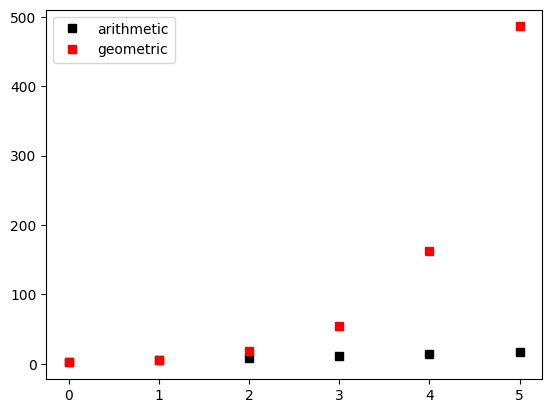

In [56]:
plt.plot(ariseq, 'ks', label='arithmetic')
plt.plot(geoseq, 'rs', label='geometric')

plt.legend()
plt.show()

##### Exercise

In [57]:
# Parameters
a = 2
d = 3
maxn = 10
nth = 6

# Compute the sequences
ariseq = a + d*np.arange(0, maxn)
geoseq = a * d**np.arange(0, maxn)

# Direct computation
ari_direct = a + d*(nth-1)
geo_direct = a * d**(nth-1)

print(ari_direct, ariseq[nth-1])
print(geo_direct, geoseq[nth-1])


17 17
486 486


#### 13. Scientific Notation

$10,021 \rightarrow  \text{Math Notation}:1 \times 10^4 \rightarrow \text{PC Notation}: 1e+04$

$2,119 \rightarrow  \text{Math Notation}: 2 \times 10^3 \rightarrow \text{PC Notation}: 2e+03$

$0.034 \rightarrow \text{Math Notation}: 3 \times 10^{-2} \rightarrow \text{PC Notation}: 3e-02$

In [58]:
x = 3984573945  

'{:,e}'.format(x)  # equals to 3.984574 times 10 to the power of 9

'3.984574e+09'

In [59]:
'{:,d}'.format(x)  # prints the number with commas

'3,984,573,945'

In [60]:
'%e' %x  # short formatting for scientific notation

'3.984574e+09'

In [61]:
'%.4e' %x  # specifying how many numbers after the decimal to be showns

'3.9846e+09'

In [62]:
s = '%.4e' %x
s[-2:]  # we can slice and find the order of magnitude from this string

'09'

##### Exercise

In [63]:
def find_magnitude(num):
    # Get the order of magnitude
    order_of_mag = int(np.floor(np.log10(abs(num))))

    # Scientific notation
    order_str = '{:,e}'.format(num)
    dot_loc = order_str.find('.')
    sci_not = order_str[:dot_loc]
    
    display(Math(
        '{%s} \\text{ is } %s \\text{ orders of magnitude, } \\approx %s \\times 10^{%g}'
        %(num, order_of_mag, sci_not, order_of_mag)
    ))

find_magnitude(-9999)

<IPython.core.display.Math object>

#### 14. Maxima and Minima of functions 

- Maxima and minima of a function together are called extrema

In [64]:
lst = [-4, 5.5, 1, 2]

maxval = np.max(lst)
minval = np.min(lst)

np.argmax(lst), np.argmin(lst)  # shows location in the list of max and min values 

(1, 0)

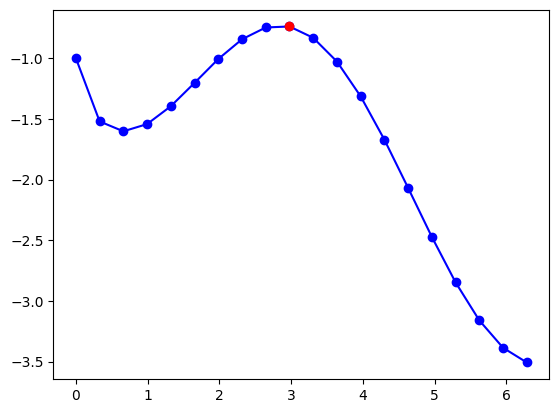

In [65]:
x = np.linspace(0, 2*np.pi, 20)
fx = -(np.cos(x) + np.sqrt(x))

fmax = np.max(fx)
fmax_idx = np.argmax(fx)

plt.plot(x, fx, 'bo-')
plt.plot(x[fmax_idx], fmax, 'ro')

plt.show()

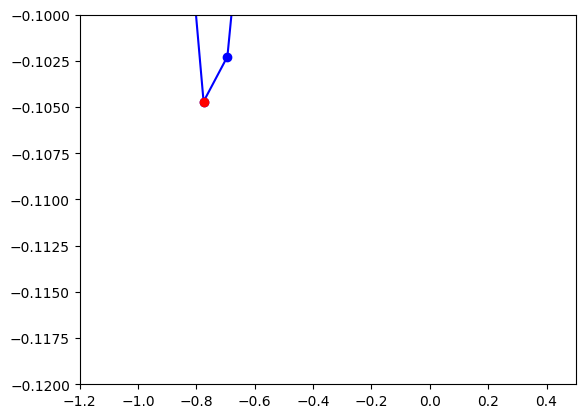

In [66]:
x = np.linspace(-2, 2, 50)
fx = x**3 + x**4

fmin_idx = np.argmin(fx)

plt.plot(x, fx, 'bo-')
plt.plot(x[fmin_idx], fx[fmin_idx], 'ro')

plt.xlim([-1.2, 0.5])  # zooming in
plt.ylim([-0.12, -0.1])

plt.show()

##### Exercise

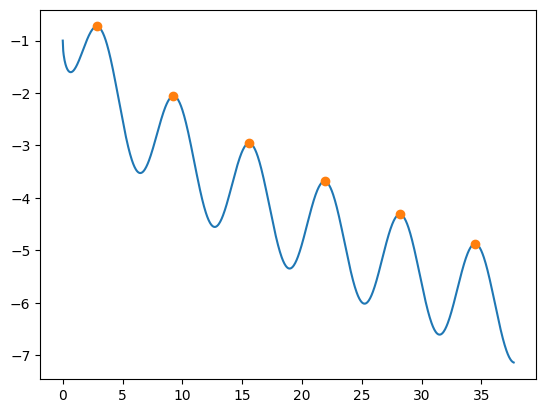

In [67]:
x = np.linspace(0, 12*np.pi, 1000)
fx = -np.cos(x) - np.sqrt(x)

plt.plot(x, fx)

peaks, _ = find_peaks(fx)

plt.plot(x[peaks], fx[peaks], 'o')

plt.show()

#### 15. Even and Odd Functions

- $f(x)$ is **even** if $f(-x) = f(x)$

- $f(x)$ is **odd** if $f(-x) = -f(x)$

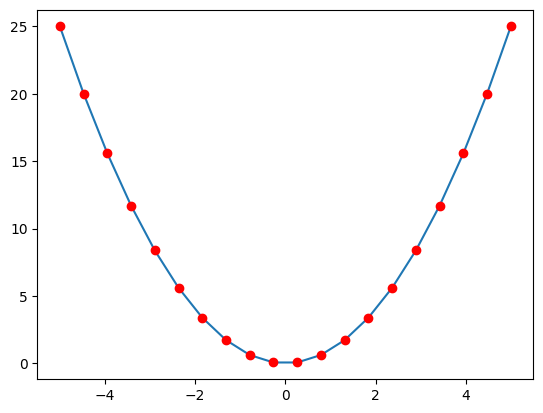

In [68]:
x = np.linspace(-5, 5, 20)

f_even = x**2
f_even_neg = (-x)**2

plt.plot(x, f_even)
plt.plot(x, f_even_neg, 'ro')

plt.show()

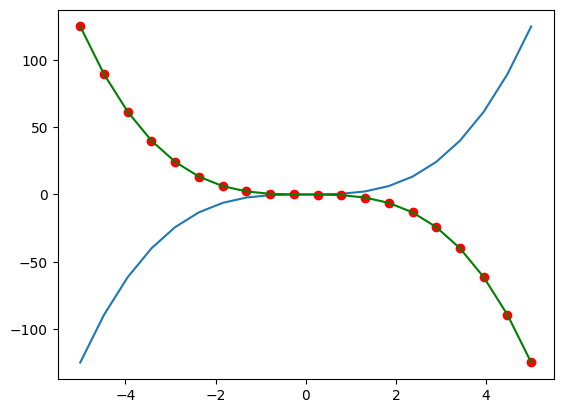

In [69]:
x = np.linspace(-5, 5, 20)

f_odd = x**3
f_odd_neg = (-x)**3
f_neg_odd = -f_odd

plt.plot(x, f_odd)
plt.plot(x, f_odd_neg, 'ro')
plt.plot(x, f_neg_odd, 'g')

plt.show()

##### Exercise

Determine whether sine and cosine are even or odd functions.

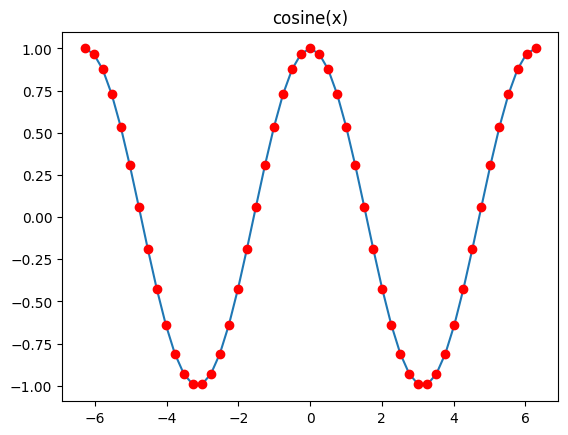

In [70]:
x = np.linspace(-2*np.pi, 2*np.pi, 51)

fx = np.cos(x)
fx_neg = np.cos(-x)

plt.plot(x, fx)
plt.plot(x, fx_neg, 'ro')

plt.title('cosine(x)')

plt.show()
# Cosine is an even function.

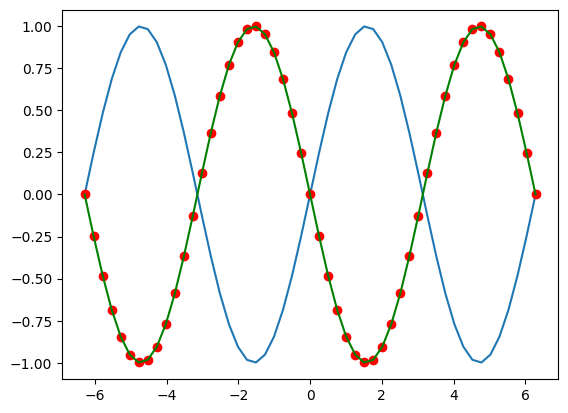

In [71]:
x = np.linspace(-2*np.pi, 2*np.pi, 51)

fx = np.sin(x)
fx_neg = np.sin(-x)
fx_neg_odd = -fx

plt.plot(x, fx)
plt.plot(x, fx_neg, 'ro')
plt.plot(x, fx_neg_odd, 'g')

plt.show()
# Sine is an odd function